In [1]:
import numpy as np
import pandas as pd
from constants import *
import math
import random
import matplotlib.pyplot as plt
import dill
from scipy.cluster.hierarchy import dendrogram, linkage  
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

In [2]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [3]:
df = pd.read_csv('../Data/merged.txt', sep=",", na_values=['-'])
df = df.dropna()
df = df[['cdReads0','cdReads1','cdReads2','cdRPKM0','cdRPKM1','cdRPKM2']]
# df = df[(df['cdReads0'] >= 0) & (df['cdReads1'] >= 100) & (df['cdReads2'] >= 100)]
df = df[['cdRPKM0','cdRPKM1','cdRPKM2']]

In [4]:
df.head(5)
X = np.log2(df.values)
print(len(X))

11087


In [5]:
cluster = AgglomerativeClustering(affinity='euclidean', linkage='ward')  
model = cluster.fit_predict(X)  

In [39]:
Z = linkage(X, 'ward')

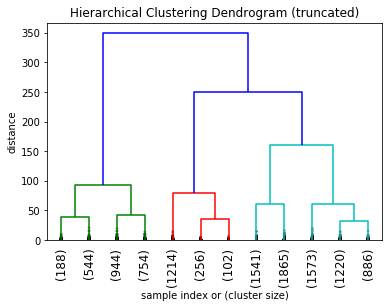

In [40]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

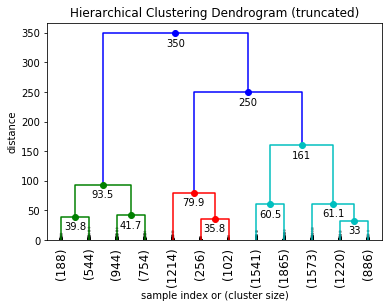

In [41]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()